In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# $Определим\ значения\ констант$

In [2]:
alphabet = [letter for letter in 'абвгдеёжзийклмнопрстуфхцчшщъьэюя']

a1, a2, a3 = [alphabet.index(letter)+1 for letter in 'григорян'[:3]]
b1, b2, b3 = [alphabet.index(letter)+1 for letter in 'тигран'[:3]]
c1, c2, c3 = [alphabet.index(letter)+1 for letter in 'артурович'[:3]]

print(f'a1={a1}, a2={a2}, a3={a3}', 
      f'b1={b1}, b2={b2}, b3={b3}', 
      f'c1={c1}, c2={c2}, c3={c3}',
     sep='\n')

a1=4, a2=18, a3=10
b1=20, b2=10, b3=4
c1=1, c2=18, c3=20


# $Задача\ 1$

In [3]:
t, C1, C2 = symbols('t C1 C2')
y = Function('y')(t)
V = y.diff(t)**2 + 4*y**2 + y.diff(t) * exp(4*t)

# уравнение Эйлера-Лагранжа
EL_equation = Eq(diff(V.diff(y.diff(t)), t) - V.diff(y), 0)

# граничные условия
boundary_conditions = {y.subs(t, 0): -b2, y.subs(t, 2): b1}
solution = dsolve(EL_equation.subs(boundary_conditions), y)

solution

Eq(y(t), C1*exp(-2*t) + C2*exp(2*t) - exp(4*t)/6)

In [4]:
# найдем константы
constants = solve([solution.rhs.subs(t, 0) - -b2, solution.rhs.subs(t, 2) - b1], [C1, C2])
solution = solution.subs({C1: constants[C1], C2: constants[C2]})

solution

Eq(y(t), -exp(4*t)/6 + (59 + 120*exp(4) + exp(12))*exp(2*t)/(-6 + 6*exp(8)) + (-59*exp(8) - exp(12) - 120*exp(4))*exp(-2*t)/(-6 + 6*exp(8)))

In [5]:
# получим схожий ответ, только в численном выражении 

solution.evalf(3)

Eq(y(t), -0.167*exp(4*t) + 9.47*exp(2*t) - 19.3*exp(-2*t))

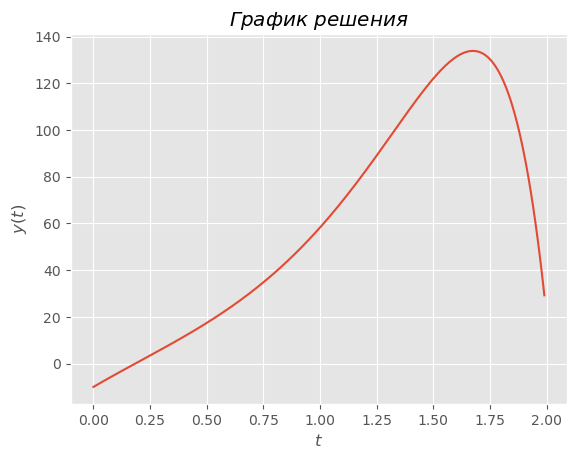

In [6]:
# изобразим полученный результат
t1 = np.arange(0.0, 2.0, 0.01)
y1 = [solution.subs({t: tt}).rhs for tt in t1]

plt.style.use('ggplot') 
plt.plot(t1, y1)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('$График\ решения$')
plt.show();

# $Задача\ 2$

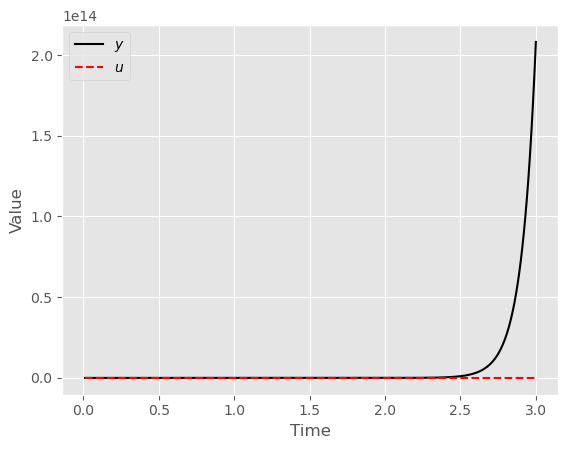

In [7]:
m = GEKKO(remote=False)
nt = 301
m.time = np.linspace(0,3,nt)

y = m.Var(value=a1)
z = m.Var(value=5)
u = m.Var(value=0,lb=-c1,ub=c2)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt() == a3*y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1*y - b2*u**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)

plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# $Задача\ 7$

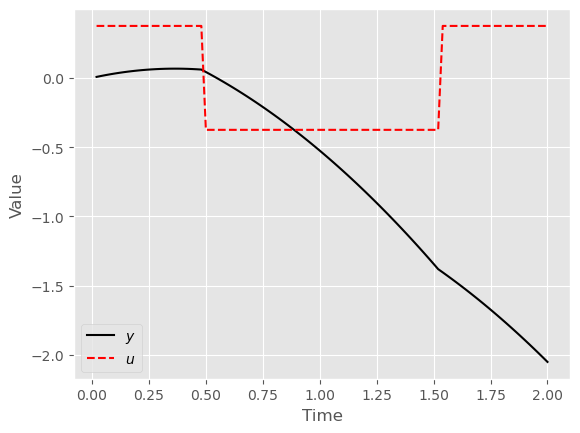

In [8]:
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)

y = m.Var(value=0)
z = m.Var(value=5)
u = m.Var(value=0,lb=-3/8,ub=3/8)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt() == u - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == u**2/2 - t*y + y)
m.Obj(-z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)

plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

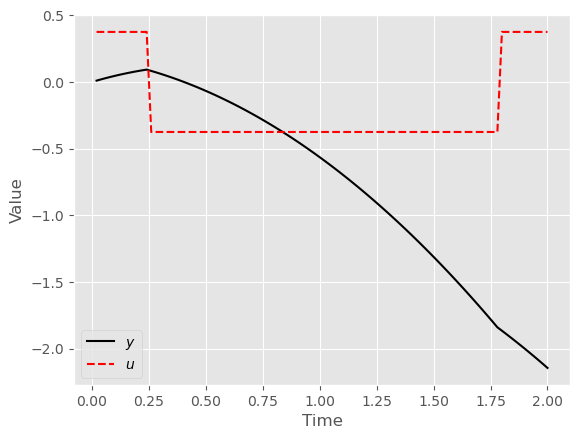

In [9]:
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)

y = m.Var(value=0)
z = m.Var(value=5)
u = m.Var(value=0,lb=-3/8,ub=3/8)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt() == u + u**2 - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == u**2/2 - t*y + y)
m.Obj(-z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)

plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()